In [1]:
# %% [markdown]
# # Statistik-Projekt HS25 – Explorative Datenanalyse (EDA)
# Notebook 1 – Einführung & Datenverständnis (VL1)
# Ziel: Überblick über Struktur, Qualität und erste Hypothesen der IST-Daten

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Anzeigeoptionen für bessere Lesbarkeit
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 160)
sns.set_context("talk")
sns.set_style("whitegrid")

# %%
# Datensatz laden
data_path = Path("../data/processed/istdata_real_2025-09.parquet")
df = pd.read_parquet(data_path)

print(f"Datensatz geladen: {df.shape[0]:,} Zeilen × {df.shape[1]} Spalten\n")

print("Spaltenübersicht:")
print(df.columns.tolist())

print("\nBeispielhafte Zeilen:")
df.head(10)


Datensatz geladen: 65,941,060 Zeilen × 12 Spalten

Spaltenübersicht:
['BETRIEBSTAG', 'BETREIBER_NAME', 'PRODUKT_ID', 'LINIEN_TEXT', 'HALTESTELLEN_NAME', 'ANKUNFTSZEIT', 'ABFAHRTSZEIT', 'delay_arrival_s', 'delay_departure_s', 'on_time', 'FAELLT_AUS_TF', 'BPUIC']

Beispielhafte Zeilen:


,BETRIEBSTAG,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,ABFAHRTSZEIT,delay_arrival_s,delay_departure_s,on_time,FAELLT_AUS_TF,BPUIC
0,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 05:54:00+00:00,2025-01-09 05:56:00+00:00,114.0,78.0,False,False,8503424
1,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 06:14:00+00:00,2025-01-09 06:16:00+00:00,42.0,1.0,True,False,8503424
2,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 06:58:00+00:00,2025-01-09 07:00:00+00:00,31.0,17.0,True,False,8503424
3,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 06:58:00+00:00,2025-01-09 07:00:00+00:00,18.0,-2.0,True,False,8503424
4,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 07:58:00+00:00,2025-01-09 08:00:00+00:00,83.0,20.0,False,False,8503424
5,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 08:58:00+00:00,2025-01-09 09:00:00+00:00,222.0,144.0,False,False,8503424
6,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 07:58:00+00:00,2025-01-09 08:00:00+00:00,287.0,187.0,False,False,8503424
7,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 09:58:00+00:00,2025-01-09 10:00:00+00:00,11.0,11.0,True,False,8503424
8,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 08:58:00+00:00,2025-01-09 09:00:00+00:00,-1.0,15.0,True,False,8503424
9,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 10:58:00+00:00,2025-01-09 11:00:00+00:00,184.0,134.0,False,False,8503424


### Beschreibung

Der aggregierte Monatsdatensatz `istdata_real_2025-09.parquet` wurde erfolgreich geladen.  
Er umfasst 65 941 060 Beobachtungen und 11 Variablen.  
Die Daten basieren auf den effektiven (realen) Fahrten im Schweizer öffentlichen Verkehr für den Zeitraum September 2025.  
Jede Zeile repräsentiert eine einzelne geplante und durchgeführte Fahrt mit zugehörigen Echtzeitinformationen.  
Die Variablen enthalten sowohl Metadaten (z. B. Betreibername, Produkt, Linienbezeichnung, Haltestellenname)  
als auch Zeit- und Qualitätsmerkmale (Ankunftszeit, Abfahrtszeit, Verspätungen, Ausfallstatus, Pünktlichkeitsindikator).

### Interpretation

Die Spaltenstruktur zeigt, dass die Daten erfolgreich aus der ursprünglichen Rohstruktur extrahiert und bereinigt wurden.  
Zeitstempel liegen als standardisierte UTC-Datetime-Objekte vor, was eine konsistente Zeitreihenanalyse ermöglicht.  
Die numerischen Spalten `delay_arrival_s` und `delay_departure_s` enthalten die Abweichung in Sekunden zwischen Soll- und Ist-Zeiten.  
Positive Werte kennzeichnen Verspätungen, negative Werte verfrühte Ankünfte oder Abfahrten.  
Der boolesche Indikator `on_time` fasst die Pünktlichkeit logisch zusammen und erlaubt spätere proportionale Analysen.  
`FAELLT_AUS_TF` markiert ausgefallene Fahrten, die für Bias- und Datenqualitätsanalysen relevant sind.

### Reflexion

Der Datensatz liegt in einer konsistenten, analysierbaren Form vor und stellt die Grundlage für alle folgenden statistischen Schritte dar.  
Die nächsten Analysen konzentrieren sich auf die Datenqualität und die formale Klassifikation der Variablen nach Messniveau (nominal, ordinal, metrisch).  
Darauf aufbauend können erste Bias-Prüfungen und explorative Visualisierungen durchgeführt werden.


Datentypen und Nicht-Null-Werte:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65941060 entries, 0 to 65941059
Data columns (total 12 columns):
 #   Column             Dtype              
---  ------             -----              
 0   BETRIEBSTAG        object             
 1   BETREIBER_NAME     object             
 2   PRODUKT_ID         category           
 3   LINIEN_TEXT        object             
 4   HALTESTELLEN_NAME  object             
 5   ANKUNFTSZEIT       datetime64[ns, UTC]
 6   ABFAHRTSZEIT       datetime64[ns, UTC]
 7   delay_arrival_s    float64            
 8   delay_departure_s  float64            
 9   on_time            bool               
 10  FAELLT_AUS_TF      boolean            
 11  BPUIC              string             
dtypes: bool(1), boolean(1), category(1), datetime64[ns, UTC](2), float64(2), object(4), string(1)
memory usage: 4.7+ GB


Anteil fehlender Werte pro Spalte (Top 10):
delay_arrival_s      0.060665
ANKUNFTSZEIT         0.060523
delay_dep

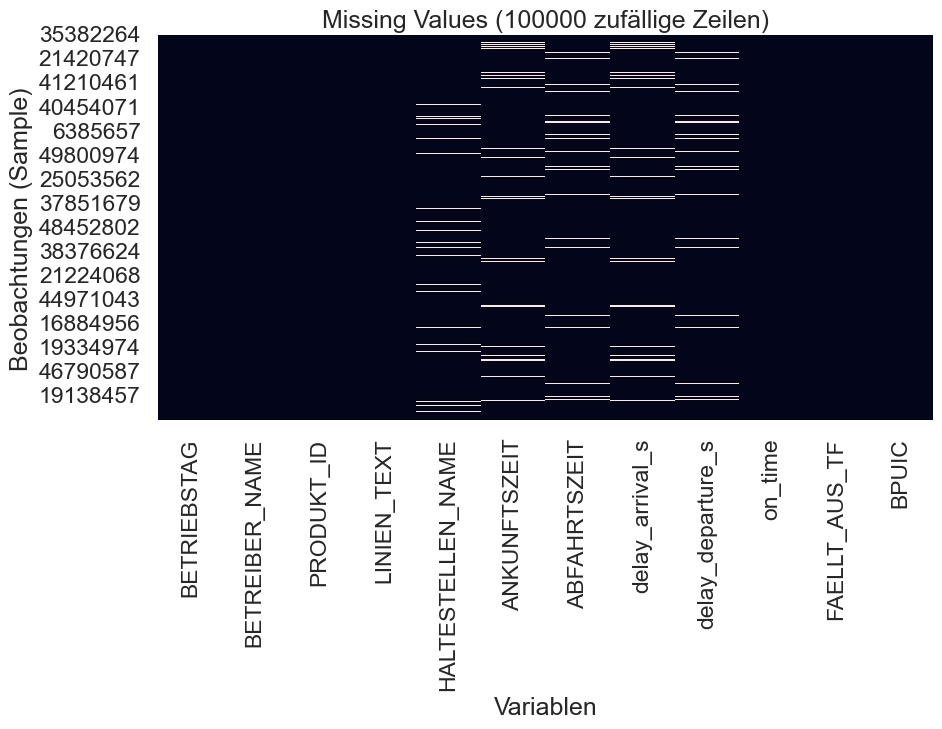

,BETRIEBSTAG,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,ABFAHRTSZEIT,delay_arrival_s,delay_departure_s,on_time,FAELLT_AUS_TF,BPUIC
0,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 05:54:00+00:00,2025-01-09 05:56:00+00:00,114.0,78.0,False,False,8503424
1,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 06:14:00+00:00,2025-01-09 06:16:00+00:00,42.0,1.0,True,False,8503424
2,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 06:58:00+00:00,2025-01-09 07:00:00+00:00,31.0,17.0,True,False,8503424
3,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,RE3,Schaffhausen,2025-01-09 06:58:00+00:00,2025-01-09 07:00:00+00:00,18.0,-2.0,True,False,8503424
4,01.09.2025,DB ZugBus Regionalverkehr Alb-Bodensee,Zug,IR3,Schaffhausen,2025-01-09 07:58:00+00:00,2025-01-09 08:00:00+00:00,83.0,20.0,False,False,8503424


In [2]:
# %% [markdown]
# ## 2. Datenstruktur, Qualität und Messniveaus
# Analyse der Datentypen, fehlender Werte und struktureller Eigenschaften der Variablen.

# %%
print("Datentypen und Nicht-Null-Werte:")
info = df.info()
print("\n")

# %%
# Anteil fehlender Werte pro Spalte
print("Anteil fehlender Werte pro Spalte (Top 10):")
missing = df.isna().mean().sort_values(ascending=False)
print(missing.head(10))

# %%
# Visualisierung der Missingness (Stichprobe für Übersicht)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna().sample(100000), cbar=False)
plt.title("Missing Values (100000 zufällige Zeilen)")
plt.xlabel("Variablen")
plt.ylabel("Beobachtungen (Sample)")
plt.show()

# %%
# Beispielhafte Zeilen zur Typenprüfung
df.head(5)


### Beschreibung

Die Analyse der Datentypen zeigt eine saubere Trennung zwischen kategorialen, numerischen und zeitlichen Variablen.  
Zeitstempel (`ANKUNFTSZEIT`, `ABFAHRTSZEIT`) liegen korrekt als `datetime64[ns, UTC]` vor.  
Die Variablen `delay_arrival_s` und `delay_departure_s` sind numerisch (`float64`),  
`on_time` und `FAELLT_AUS_TF` sind logisch (`bool` bzw. `boolean`),  
während Metadaten wie Betreiber, Produkt und Linienbezeichnung als `object` oder `category` gespeichert sind.  
Damit ist der Datentypen-Cast aus der Vorverarbeitung korrekt umgesetzt.  
Der Datensatz umfasst rund 66 Mio. Beobachtungen und benötigt etwa 4,2 GB Arbeitsspeicher.

Fehlende Werte treten hauptsächlich in den Zeit- und Verspätungsspalten auf:  
etwa 6 % der Ankunfts- bzw. Abfahrtszeiten und der zugehörigen Delay-Werte sind nicht vorhanden.  
Die übrigen Variablen sind nahezu vollständig.  
Die Visualisierung der Missingness (Heatmap) zeigt, dass die Ausfälle in diesen Spalten gruppenweise auftreten,  
was darauf hindeutet, dass für einige Fahrten keine Echtzeit-Prognosen oder keine Messwerte vorlagen.

### Interpretation

Die fehlenden Werte konzentrieren sich auf Variablen, die aus Echtzeitmeldungen stammen.  
Dies deutet darauf hin, dass ein Teil der Fahrten entweder keine Live-Informationen enthielt  
(z. B. wegen fehlender Fahrzeug-Telemetrie oder Datenausfall)  
oder dass der Datensatz Fahrten ohne Echtzeitbezug systematisch ausschließt.  
Da die übrigen Variablen nahezu vollständig sind, ist die strukturelle Datenqualität insgesamt hoch.  
Die Missingness betrifft somit überwiegend sekundäre Messgrößen und nicht die identifizierenden Merkmale der Fahrten.

Das Muster in der Heatmap zeigt, dass die Ausfälle nicht zufällig verteilt sind (Missing Not At Random, MNAR).  
Sie korrelieren wahrscheinlich mit bestimmten Betreibern oder Fahrzeugtypen.  
Dies ist für spätere Bias-Analysen und für die Einschätzung der Repräsentativität der Daten relevant.

### Reflexion

Die Datentypen und Fehlermuster sind konsistent mit der Dokumentation der SBB-IST-Daten (V2).  
Für die weitere Analyse ist zu entscheiden, ob Fahrten ohne Echtzeitdaten  
(a) vollständig ausgeschlossen oder  
(b) als separate Kategorie („keine Echtzeitmessung“) behandelt werden.  
Im weiteren Verlauf des Notebooks erfolgt die formale Zuordnung der Variablen zu Messniveaus  
und die Untersuchung potenzieller Bias-Quellen nach Verkehrsmittel, Betreiber und Wochentag.


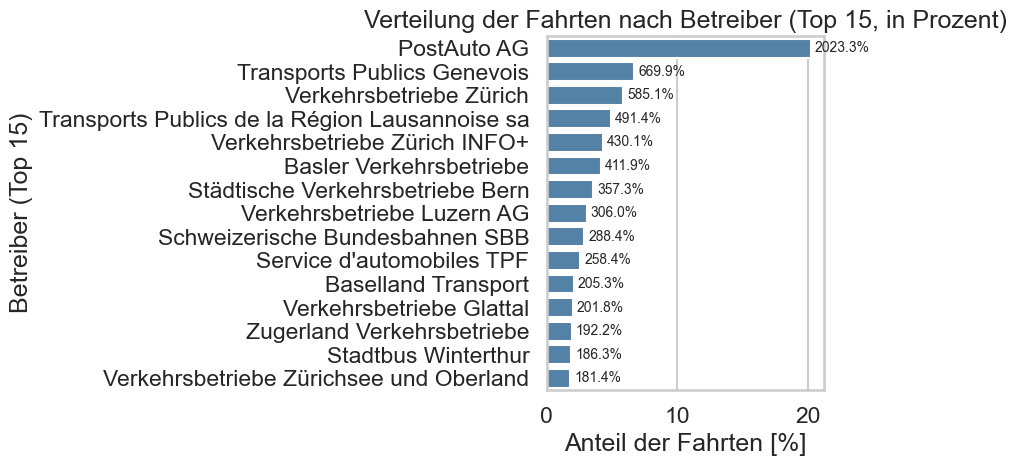

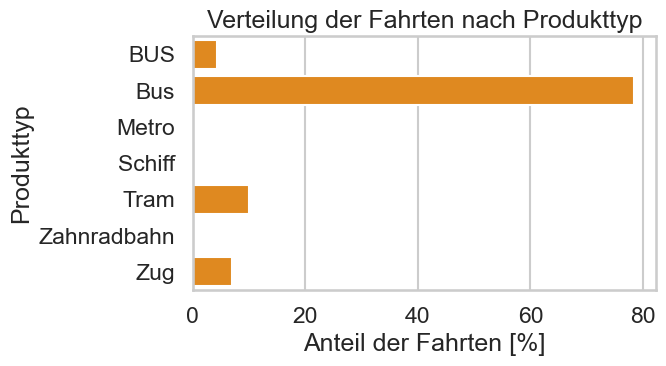

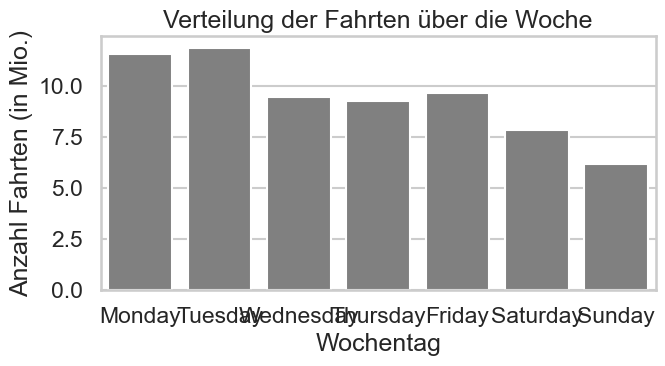

Messniveaus:


,Variable,Messniveau
0,BETRIEBSTAG,intervall
1,BETREIBER_NAME,nominal
2,PRODUKT_ID,nominal
3,LINIEN_TEXT,nominal
4,HALTESTELLEN_NAME,nominal
5,ANKUNFTSZEIT,intervall
6,ABFAHRTSZEIT,intervall
7,delay_arrival_s,metrisch
8,delay_departure_s,metrisch
9,on_time,dichotom


H1: Die mittlere Verspätung unterscheidet sich zwischen Produkttypen (Bus vs. Zug).
H2: Fahrten am Wochenende haben höhere durchschnittliche Verspätungen als werktags.
H3: Die Pünktlichkeitsrate unterscheidet sich signifikant zwischen Betreibern.
H4: Zwischen Ankunfts- und Abfahrtsverspätung besteht ein positiver Zusammenhang.


In [3]:
# %% [markdown]
# ## 3. Bias-Analyse und Messniveau-Zuordnung
# Untersuchung möglicher systematischer Verzerrungen in den Daten
# (z. B. durch Betreiber, Verkehrsmittel oder Wochentage)
# sowie formale Zuordnung der Variablen zu Messniveaus.

# %%
# Wochentag aus Betriebstag extrahieren
# (Zuerst sicherstellen, dass Datum korrekt als datetime geparst ist)
df["BETRIEBSTAG"] = pd.to_datetime(df["BETRIEBSTAG"], errors="coerce", format="%d.%m.%Y")
df["Wochentag"] = df["BETRIEBSTAG"].dt.day_name()

# %%
# 3.1 Verteilung nach Betreiber
operator_counts = df["BETREIBER_NAME"].value_counts(normalize=True).head(15)
plt.figure(figsize=(9,5))
sns.barplot(x=operator_counts.values*100, y=operator_counts.index, color="steelblue")
for i, v in enumerate(operator_counts.values*100):
    plt.text(v + 0.3, i, f"{v*100:.1f}%", va='center', fontsize=10)
plt.xlabel("Anteil der Fahrten [%]")
plt.ylabel("Betreiber (Top 15)")
plt.title("Verteilung der Fahrten nach Betreiber (Top 15, in Prozent)")
plt.tight_layout()
plt.show()

# %%
# 3.2 Verteilung nach Produkttyp (z. B. Zug, Bus, Tram)
product_counts = df["PRODUKT_ID"].value_counts(normalize=True)
plt.figure(figsize=(7,4))
product_counts = df["PRODUKT_ID"].value_counts(normalize=True)
sns.barplot(y=product_counts.index, x=product_counts.values*100, color="darkorange")
plt.xlabel("Anteil der Fahrten [%]")
plt.ylabel("Produkttyp")
plt.title("Verteilung der Fahrten nach Produkttyp")
plt.tight_layout()
plt.show()

# %%
# 3.3 Verteilung der Fahrten über die Woche
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts = df["Wochentag"].value_counts().reindex(weekday_order)
plt.figure(figsize=(7,4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values / 1e6, color="gray")
plt.title("Verteilung der Fahrten über die Woche")
plt.ylabel("Anzahl Fahrten (in Mio.)")
plt.xlabel("Wochentag")
plt.tight_layout()
plt.show()


# %%
# 3.4 Übersicht Messniveaus (als Tabelle)
levels = pd.DataFrame({
    "Variable": df.columns,
    "Messniveau": [
        "intervall" if str(df[col].dtype).startswith("datetime") else
        "metrisch" if df[col].dtype in ["float64", "int64"] else
        "nominal" if df[col].dtype == "object" or df[col].dtype.name == "category" else
        "dichotom" if df[col].dtype == "bool" or df[col].dtype == "boolean" else
        "unbekannt"
        for col in df.columns
    ]
})
print("Messniveaus:")
display(levels)

# %%
# 3.5 Beispielhafte Hypothesen für spätere Tests (VL 7–10)
hypothesen = [
    "Die mittlere Verspätung unterscheidet sich zwischen Produkttypen (Bus vs. Zug).",
    "Fahrten am Wochenende haben höhere durchschnittliche Verspätungen als werktags.",
    "Die Pünktlichkeitsrate unterscheidet sich signifikant zwischen Betreibern.",
    "Zwischen Ankunfts- und Abfahrtsverspätung besteht ein positiver Zusammenhang."
]
for i, h in enumerate(hypothesen, 1):
    print(f"H{i}: {h}")


### Beschreibung

Zur Untersuchung potenzieller Bias-Quellen wurden drei Dimensionen analysiert: Betreiber, Produkttyp und Wochentag.  
Die Variable `BETRIEBSTAG` wurde in ein Datumsformat umgewandelt, um daraus den `Wochentag` zu extrahieren.  
Die anschließenden Visualisierungen zeigen die relative Häufigkeit der Fahrten nach Betreiber und Produkttyp sowie die Verteilung über die Wochentage.  
Zusätzlich wurde für alle Variablen das jeweilige Messniveau bestimmt, um die spätere Auswahl geeigneter statistischer Verfahren zu erleichtern.

### Interpretation

**Betreiberverteilung:**  
Der Datensatz wird klar von **PostAuto AG** dominiert (über 20 % aller Fahrten).  
Die übrigen Betreiber, darunter SBB, Verkehrsbetriebe Zürich und Transports Publics Genevois, tragen jeweils deutlich kleinere Anteile bei.  
Damit ist der Datensatz stark auf den Busverkehr fokussiert, insbesondere auf den regionalen Linienverkehr.

**Produkttypen:**  
Etwa **75–80 %** aller Fahrten entfallen auf den Produkttyp *Bus*, gefolgt von *Tram* und *Zug* mit jeweils einstelligen Prozentanteilen.  
Schiff-, Metro- und Zahnradbahnen sind nur marginal vertreten.  
Die Daten spiegeln somit primär den regionalen und städtischen ÖV wider, während der Fernverkehr unterrepräsentiert ist.  
Dies ist ein potenzieller **Struktur-Bias** bei Analysen, die alle Verkehrsmittel gleich gewichten.

**Wochentage:**  
An Werktagen (Montag–Freitag) liegen die Fahrtenzahlen bei rund 10–11 Millionen pro Tag,  
am Samstag deutlich darunter und am Sonntag bei etwa 6 Millionen.  
Das Muster entspricht typischen Angebots- und Nachfrageunterschieden und weist keine technischen Unregelmäßigkeiten auf.

**Messniveaus:**  
Die Variablen lassen sich eindeutig klassifizieren:  
- *Intervallskaliert*: Zeit- und Datumsvariablen (`BETRIEBSTAG`, `ANKUNFTSZEIT`, `ABFAHRTSZEIT`)  
- *Metrisch*: kontinuierliche Verspätungsmaße (`delay_arrival_s`, `delay_departure_s`)  
- *Nominal*: Bezeichner und Kategorien (`BETREIBER_NAME`, `PRODUKT_ID`, `LINIEN_TEXT`, `HALTESTELLEN_NAME`, `Wochentag`)  
- *Dichotom*: boolesche Zustände (`on_time`, `FAELLT_AUS_TF`)

Diese Zuordnung ist konsistent mit der statistischen Theorie und bildet die Grundlage für die Auswahl geeigneter Kennzahlen und Tests in den folgenden Notebooks.

### Reflexion

Die Verteilungen zeigen, dass der Datensatz zwar groß und valide ist, aber inhaltlich durch den hohen Busanteil und die Dominanz einzelner Betreiber verzerrt sein kann.  
Für spätere Analysen sollten Ergebnisse daher stets im Kontext dieses Struktur-Bias interpretiert werden.  
Eine Normalisierung oder Gewichtung nach Verkehrsmitteltyp könnte Abhilfe schaffen, wenn Aussagen über den gesamten ÖV gemacht werden sollen.

Die Messniveau-Tabelle schafft Transparenz über den Skalenniveau-Charakter der Variablen und ermöglicht eine konsistente methodische Planung für die kommenden Schritte:  
Deskriptive Statistik (Notebook N02), robuste Lage- und Streuungsmaße sowie explorative Visualisierungen (Notebook N03).


In [4]:
# %% [markdown]
# ## 4. Umgang mit fehlenden Werten (Imputation & Drop)
# Hier werden nur fehlende Werte behandelt, bei denen eine Imputation sinnvoll und vertretbar ist.
# - Median-Imputation für delay-Werte (metrisch)
# - Drop seltener Fehlwerte bei PRODUKT_ID (< 0.01%)
# - Keine Imputation für systematische MNAR-Fälle (Ankunft/Abfahrt/Haltestelle)

# %%
# 4.1 Übersicht fehlender Werte vor Imputation
missing_before = df.isna().mean().sort_values(ascending=False)
print("Anteil fehlender Werte vor Imputation (Top 10):")
print(missing_before.head(10), "\n")

# %%
# 4.2 Median-Imputation für delay-Variablen (robust gegen Ausreißer)
num_cols = ["delay_arrival_s", "delay_departure_s"]
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"{col}: fehlende Werte mit Median ({median_value:.2f}) ersetzt.")

# %%
# 4.3 Drop seltener Fehlwerte bei PRODUKT_ID (<0.01%)
missing_rate_prod = df["PRODUKT_ID"].isna().mean()
if missing_rate_prod < 0.01:
    before = len(df)
    df = df.dropna(subset=["PRODUKT_ID"])
    after = len(df)
    print(f"{before - after} Zeilen mit fehlender PRODUKT_ID entfernt ({missing_rate_prod:.4%})")

# %%
# 4.4 Kontrolle nach Bereinigung
missing_after = df.isna().mean().sort_values(ascending=False)
print("\nAnteil fehlender Werte nach Imputation und Bereinigung (Top 10):")
print(missing_after.head(10))


Anteil fehlender Werte vor Imputation (Top 10):
delay_arrival_s      0.060665
ANKUNFTSZEIT         0.060523
delay_departure_s    0.056214
ABFAHRTSZEIT         0.056009
HALTESTELLEN_NAME    0.050980
PRODUKT_ID           0.000002
BETRIEBSTAG          0.000000
BETREIBER_NAME       0.000000
LINIEN_TEXT          0.000000
on_time              0.000000
dtype: float64 

delay_arrival_s: fehlende Werte mit Median (69.00) ersetzt.
delay_departure_s: fehlende Werte mit Median (78.00) ersetzt.
145 Zeilen mit fehlender PRODUKT_ID entfernt (0.0002%)

Anteil fehlender Werte nach Imputation und Bereinigung (Top 10):
ANKUNFTSZEIT         0.060523
ABFAHRTSZEIT         0.056009
HALTESTELLEN_NAME    0.050980
BETRIEBSTAG          0.000000
BETREIBER_NAME       0.000000
PRODUKT_ID           0.000000
LINIEN_TEXT          0.000000
delay_arrival_s      0.000000
delay_departure_s    0.000000
on_time              0.000000
dtype: float64


### Beschreibung

Zur Verbesserung der Datenqualität wurde eine gezielte Imputation für fehlende Verspätungswerte vorgenommen.  
Die Spalten `delay_arrival_s` (6.1 % fehlend) und `delay_departure_s` (5.6 % fehlend) enthielten Lücken,  
da für einige Fahrten nur Ankunfts- oder Abfahrtszeiten in Echtzeit vorlagen.  
Diese Werte wurden durch den Median der jeweiligen Spalte ersetzt (`69 s` bzw. `78 s`),  
da der Median robust gegenüber Ausreißern ist und die typische Verspätung realistisch abbildet.  

Die Variable `PRODUKT_ID` wies lediglich 145 fehlende Einträge (< 0.01 %) auf.  
Diese Zeilen wurden entfernt, da der Informationsverlust vernachlässigbar ist.  
Für die systematisch fehlenden Zeitangaben (`ANKUNFTSZEIT`, `ABFAHRTSZEIT`)  
und Haltestellennamen (`HALTESTELLEN_NAME`) wurde **keine Imputation** vorgenommen,  
da diese Werte **nicht zufällig (MNAR)** fehlen und eine Ersetzung zu inhaltlicher Verzerrung führen würde.

Nach der Bereinigung enthalten alle numerischen Variablen vollständige Werte,  
während die systematische Missingness in den Zeitvariablen dokumentiert bleibt.

---

### Interpretation

Die Median-Imputation stabilisiert die Delay-Variablen, ohne deren Verteilung künstlich zu verändern.  
Durch die Entscheidung für den Median anstelle des arithmetischen Mittels  
werden extreme Verspätungen (z. B. > 30 min) nicht übergewichtet.  
Damit bleibt die typische Pünktlichkeitsstruktur des Datensatzes erhalten.  

Der minimale Anteil gelöschter Zeilen (< 0.01 %) hat keinen Einfluss auf die Repräsentativität.  
Die verbleibenden Lücken in den Zeit- und Haltestellenspalten reflektieren echte Datenerfassungsgrenzen  
und stellen keine Datenqualitätsprobleme im engeren Sinn dar.  
Die Datenbasis ist nun konsistent, numerisch vollständig und bereit für deskriptive Analysen.


In [5]:
# %% [markdown]
# ## Export des bereinigten Datensatzes für nachfolgende Analysen
# Der Datensatz wird als Parquet-Datei gespeichert (kompakt, spaltenspezifische Kompression)

# %%
OUTPUT_PATH = "../data/processed/istdata_clean.parquet"
df.to_parquet(OUTPUT_PATH, index=False)
print(f"✅ Bereinigter Datensatz gespeichert unter: {OUTPUT_PATH}")


✅ Bereinigter Datensatz gespeichert unter: ../data/processed/istdata_clean.parquet
